$$
\begin{array}{c}
\text{$\Large Prediction\ is\ very\ difficult,\ especially\ if\ it's\ about\ the\ future.$} \\
{\text{$\small Nils\ Bohr,\ Nobel\ laureate\ in\ Physics$}} \\
\end{array}
$$

# 1. Introduction to Time Series Analysys

## What Makes a Series Time Series

A time series is characterized by data points that are indexed or listed in time order. This temporal ordering makes time series data unique in statistical data sets because time is a crucial independent variable. Generally, time series data will have:

1. **Consistent Time Intervals**: Data is recorded at regular intervals—be it hourly, daily, weekly, or annually.
2. **Time as a Key Variable**: The independent variable is always time.
3. **Dependence Across Time**: Observations are dependent on previous time points, which can be exploited to forecast future events.

## Example of Time Series

To illustrate, consider your example of a bakery. The bakery's sales data collected over several months can be viewed as a time series where each data point represents sales volume at a specific time interval (say daily):

- **Time Axis (X-Axis)**: Represents the specific days over a period of several months.
- **Data Axis (Y-Axis)**: Represents the number of items sold each day.

This plotted data will show variations across different times. For instance, sales might peak in the mornings and evenings and dip in the afternoons. Further, there might be seasonal trends with higher sales around holidays and events.

Here's the Python code to generate and plot this time series data:

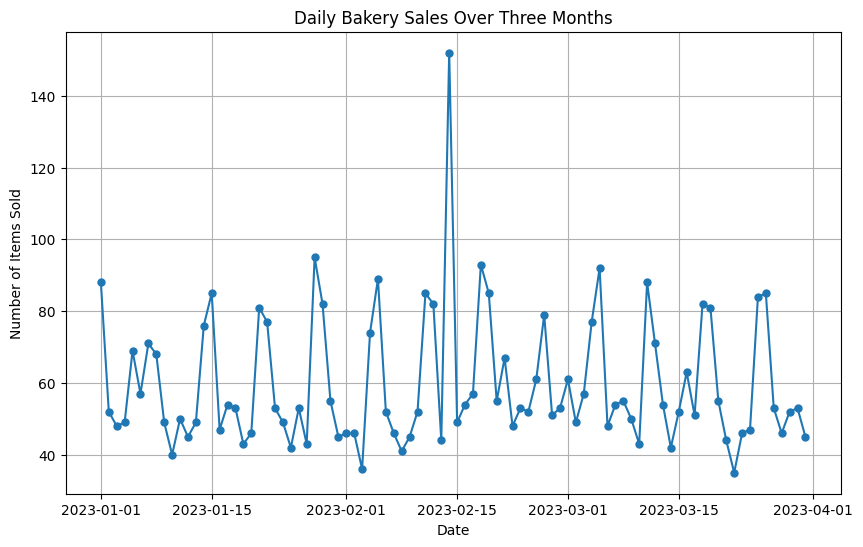

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Generate a date range
dates = pd.date_range(start='2023-01-01', periods=90, freq='D')

# Simulate daily sales data
sales = np.random.poisson(lam=50, size=len(dates))  # Average daily sales

# Introduce weekend effect
for i in range(len(dates)):
    if dates[i].weekday() >= 5:  # 5 = Saturday, 6 = Sunday
        sales[i] += np.random.randint(20, 40)  # Boost weekend sales

# Add a holiday effect
holiday = pd.Timestamp('2023-02-14')
sales[dates == holiday] += 100  # Valentine's Day effect

# Create a DataFrame
data = pd.DataFrame(data={'Sales': sales}, index=dates)
data.index.name = 'Date'

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], marker='o', linestyle='-', markersize=5)
plt.title('Daily Bakery Sales Over Three Months')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.grid(True)
plt.show()




- **Time Axis (X-Axis)**: The x-axis represents the dates from January 1, 2023, to the end of March 2023. This axis clearly demonstrates the time-dependent nature of the data, with each point corresponding to a specific day.
- **Data Axis (Y-Axis)**: The y-axis shows the number of bakery items sold each day. The data points represent the total sales volume and are inherently sequential, fulfilling the primary characteristic of time series data.
- **Seasonal Trends**: The boost in sales on weekends and on Valentine's Day illustrates seasonal and event-driven variations, which are common in time series analysis.
- **Plot Characteristics**: The line plot visually expresses how sales data varies over time, highlighting trends and cycles typical in time series analysis.

## Why are Time Series Important? 

Time series analysis is particularly well-suited for both extrapolation and interpolation because time series data is inherently sequential and often exhibits identifiable trends, cycles, and patterns. However, what are these two terms?

### Extrapolation

**Extrapolation** refers to the process of estimating beyond the original observation range to predict future values. It involves extending a model beyond the data points that were used to build it. In time series analysis, extrapolation is crucial because it allows us to forecast future events based on past trends. However, the further away from the known data range one predicts, the less reliable the predictions become because they are based on the assumption that historical patterns will continue unchanged.


### Interpolation

**Interpolation**, on the other hand, refers to estimating within the range of the observed data points. It is used to predict missing values or refine the granularity of data points between known data points in a series. Interpolation relies on the assumption that the change between known data points is smooth and can be modeled accurately.

### Sample Scenario: Sales Forecasting

Imagine a company that has recorded monthly sales data for the past five years. This time series data can be used both for extrapolation and interpolation.

- **Interpolation Example**: Suppose the company's sales data for one particular month was lost due to a technical glitch. Using interpolation methods such as linear interpolation or spline interpolation, the company could estimate the missing month's sales based on the sales figures of the surrounding months. This would help in maintaining complete records for better internal analysis and reporting.

- **Extrapolation Example**: Using the same five years of sales data, the company might want to predict sales for the next year to plan production, inventory, and staffing levels. They could use time series forecasting models like ARIMA (Autoregressive Integrated Moving Average) or exponential smoothing to extend the sales trend into the future. We'll check how ARIMA works in a different article.


## Different Components of Time Series Analysis

In time series analysis, understanding the various components that make up the data can be crucial for effective modeling and forecasting. These components are typical patterns that can be identified and separated to better understand and predict the data. Let's break down these components:

### 1. Trend



The **trend** component of a time series represents the long-term progression of the data, showing how the data values have moved over a significant period. A trend can be upward (increasing over time), downward (decreasing over time), or stable (little change over time). 

- **Example**: The gradual increase in the average global temperature over the decades is a trend. Similarly, a company's revenue might show an upward trend as it expands.

### 2. Seasonality



**Seasonality** refers to patterns that repeat at regular intervals over time, typically within a year. These patterns are predictable and occur as a result of seasonal factors such as weather, holidays, or other cyclical events.

- **Example**: In retail, sales may increase significantly during the holiday season each year due to Christmas shopping. Similarly, ice cream sales might spike every summer.

### 3. Irregularity (Noise)



**Irregularity**, or **noise**, describes the random variation in the time series. These are fluctuations that do not fit any pattern or regular cycle. They can result from unpredictable or random events and are generally not repeatable.

- **Example**: Random drops in traffic to a website might occur due to a server failure. Another example could be an unexpected event like a natural disaster affecting sales or production levels.

### 4. Cyclic



A **cyclic** pattern occurs when the data exhibit rises and falls that are not of fixed period. These fluctuations are usually longer than the seasonal pattern and can vary in length from a few years to several decades.

- **Example**: Economic recessions and expansions typically follow a cyclic pattern, which can last several years but are not as regular as seasonal patterns.

### 5. Stationarity

A time series is termed **stationary** when its key statistical properties do not depend on the time at which the series is observed. This means:
- The **mean** (average value) remains constant over time, regardless of when you observe it.
- The **variance** (the spread of the series) doesn't change over time or across different segments of the time series.
- The **autocorrelation structure** (how a data point is related to its predecessors) remains the same regardless of the time period being considered.

When a series is stationary, it's easier to model: predictions made about future values are predicated on the assumption that the way the data behaves (its structure) will continue into the future unchanged.

- **Non-Stationary Time Series**: Most time series data observed in real-world scenarios, such as economic indicators (e.g., GDP growth rates) or stock market prices, are non-stationary. These series often contain trends (either upwards or downwards), seasonality (patterns that repeat within a fixed period), and other variations over time. This non-stationarity can complicate the analysis because the shifting mean or increasing variance can lead to unreliable and inaccurate forecasts if traditional stationary-based methods are used without adjustments.

- **Stationary Time Series**: On the other hand, a stationary time series is relatively stable in terms of its statistical properties over time. An example is a white noise series, where each value is simply a random variation around a fixed mean, and each value is independent of the others. There are no trends or seasonal effects in white noise, and its statistical properties such as mean and variance do not change over time, which makes it predictable and consistent for analysis.

### Importance of the Components in Time Series Analysis



Each of these components can affect the interpretation and prediction accuracy of time series models:

- **Identifying the trend and seasonality** enables the use of decomposition methods to separate the time series into these components, simplifying the analysis and improving the accuracy of forecasts.
- **Understanding cyclic patterns** helps in long-term forecasting and in understanding the underlying factors affecting the series.
- **Recognizing and filtering out noise** can improve model accuracy.
- **Achieving stationarity** (often through transformations and differencing) is a key step in preparing a time series for many types of analysis, particularly for ARIMA (Autoregressive Integrated Moving Average) modeling.

## What Are the Limitations of Time Series Analysis?


Time series has some limitations:

- Similar to other models, the missing values are not supported by TSA
- The data points must be linear in their relationship.
- Data transformations are mandatory, so they are a little expensive.
- Models mostly work on Uni-variate data.

## Typical Steps to Understand, Model, and Forecast the Time Series Data



1. **Data Collection and Preprocessing**
    - Collecting the data
    - Cleaning the data (handling missing values, removing outliers)

2. **Exploratory Data Analysis (EDA)**
    - Visualizing the time series
    - Identifying patterns (trend and cyclical movements)
    - Decomposing the time series to observe components:
        - Trend
        - Seasonality
        - Cyclic patterns

3. **Checking Fundamental Assumptions and Characteristics**
    - Testing for stationarity
        - Visual tests (plotting the rolling mean and variance)
        - Statistical tests (e.g., Augmented Dickey-Fuller (ADF) Test)
    - Examining white noise and random walk characteristics
        - Checking if the series resembles white noise
        - Determining if the series has a random walk property
    - Assessing autocorrelation and partial autocorrelation
        - Creating Autocorrelation Function (ACF) plots
        - Creating Partial Autocorrelation Function (PACF) plots
    - Checking for seasonality (e.g., by plotting monthly data to identify yearly patterns)

4. **Statistical Model Building**
    - Autoregressive (AR) models
    - Moving Average (MA) models
    - Autoregressive Moving Average (ARMA) models
    - Autoregressive Integrated Moving Average (ARIMA) models
    - Seasonal Autoregressive Integrated Moving-Average (SARIMA) models
    - Seasonal Autoregressive Integrated Moving-Average with eXogenous regressors (SARIMAX) for models including external variables

5. **Advanced Modeling Techniques (if traditional models are insufficient)**
    - Utilizing machine learning techniques for non-linear modeling
    - Deep Learning Models:
        - Long Short-Term Memory (LSTM) networks for capturing long-term dependencies
        - Transformer-based models for handling sequential data
    - Other advanced models as needed (e.g., state-space models, VAR models)

6. **Model Validation and Diagnostic Checking**
    - Evaluating model fit on historical data
    - Residual analysis to check for white noise
    - Forecast accuracy assessment (using metrics like MAE, RMSE)

7. **Forecasting and Insights Extraction**
    - Generating future forecasts
    - Interpreting model coefficients (if applicable)
    - Extracting business or domain-specific insights from the model forecasts

8. **Model Updating and Maintenance**
    - Updating models with new data
    - Retuning and recalibrating model parameters as necessary